#### Block 0A:   Import general purpose packages for ease of use and improved performance.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Block 0B:   Import packages for a typical deep learning workflow using TensorFlow and Keras.

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split

#### Block 1:  Load the images in the CIFAR10 database.

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Reduce labels from shape (50000, 1) and (10000, 1) to (50000,) and (10000,)
y_train = np.squeeze(y_train)
y_test = np.squeeze(y_test)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


#### Block 2:  Associate class names with labels (see https://keras.io/api/datasets/cifar10 for the names).


In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

#### Block 3:  Display the red channel of the first five images.

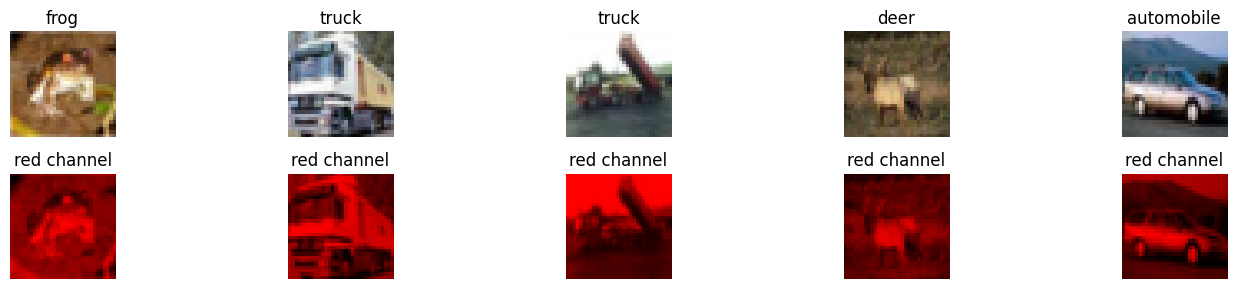

In [5]:
n_images=5

fig, axs = plt.subplots(2, n_images)
fig.set_size_inches((15, 3))

for i in range(n_images):
    ## Add a comment explaining the following three lines of code.
    img = X_train[i]
    label_idx = y_train[i]
    label_name = class_names[label_idx]

    ## Add a comment explaining the following three lines of code.
    axs[0, i].imshow(img)
    axs[0, i].set_title(f'{label_name}')
    axs[0, i].axis('off')

    ## Add a comment explaining the following three lines of code.
    red_only = np.zeros_like(img)
    red_only[:, :, 0] = img[:, :, 0]
    axs[1, i].imshow(red_only)
    axs[1, i].set_title('red channel')
    axs[1, i].axis('off')

# Show the full color and red only images, paired vertically.
fig.tight_layout()
fig.show()
## Answer the question about correspondence between red intensity and
## colors in the original image here.

Yes, the red channel shows how much red is in each part of the original image.


*   The automobile looks bright red because it has a lot of red.
*   The frog and deer images look darker in the red channel since they have less red, mostly greens and browns.
*   The truck images have some red or orange parts that show up brighter, while the shadows and cooler colors look darker.




#### Block 4:  Display a histogram of the red channel values for a single image

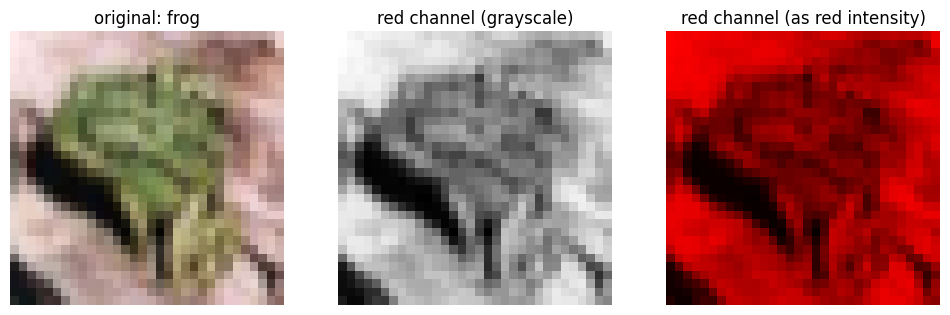

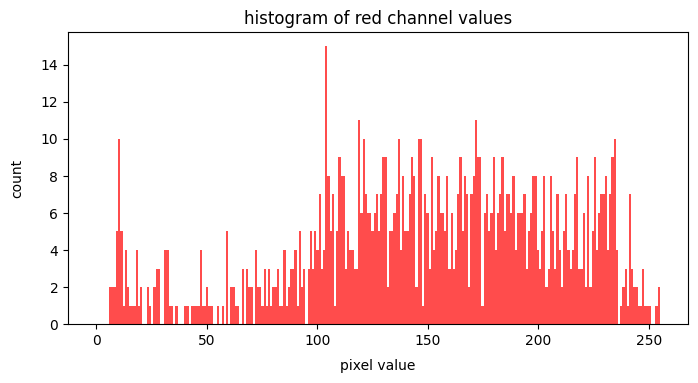

In [10]:
idx = np.random.randint(X_train.shape[0])

img = X_train[idx]
red_channel = img[:, :, 0]
red_only = np.zeros_like(img)
red_only[:, :, 0] = red_channel
nx_pixels, ny_pixels = red_channel.shape
n_pixels = nx_pixels*ny_pixels

# Create and size the figure.
fig, axs = plt.subplots(1, 3)
fig.set_size_inches((12, 4))

# Display the original image.
axs[0].imshow(img)
axs[0].set_title(f'original: {class_names[y_train[idx]]}')
axs[0].axis('off')

# Display the red channel as grayscale.
axs[1].imshow(red_channel, cmap='gray')
axs[1].set_title('red channel (grayscale)')
axs[1].axis('off')

# Display the red channel as red intensity.
axs[2].imshow(red_only)
axs[2].set_title('red channel (as red intensity)')
axs[2].axis('off')

# Display the figure.
fig.show()

# Display a histogram of red channel values.
red_channel_flat = red_channel.flatten()
# flatten() turns the 2D red channel into a 1D array so we can plot its values as a histogram.
fig, ax = plt.subplots()
fig.set_size_inches((8, 4))
ax.hist(red_channel_flat, bins=256, range=(0, 255),
        color='red', alpha=0.7)
ax.set_title('histogram of red channel values')
ax.set_xlabel('pixel value', labelpad=8)
ax.set_ylabel('count', labelpad=12)
fig.subplots_adjust(bottom=0.15)
fig.show()

#### Block 5:  Define and compile the model.

In [11]:
# Define a model having an input layer that processes flattened 32 x 32 color
# images, a hidden layer having 128 nodes, and an output layer having ten nodes
# that are the digits 0, 1, 2, ..., 9 which encode the ten objects in the
# images.  The hidden layer has ReLU activation.  The output layer has softmax
# activation.
model = keras.Sequential([
    keras.Input(shape=(32,32,3)),    # Input layer for 32x32 RGB images
    keras.layers.Flatten(),          # Flatten #D image to 1D vector
    keras.layers.Dense(128, activation='relu'),  # Hidden Layer with 128 units
    keras.layers.Dense(10, activation='softmax')   # Output Lauer with 10 class probabilities
])

# Compile the model.  Use sparse categorical cross entropy as the loss function
# (to measure closeness of predicted image labels to actual image labels).
# Minimize the loss function using the Adam optimizer.  Measure performance
# using accuracy, which is (# correct predictions)/(# images).
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### Block 6:  Rescale values from 0 to 255 to 0 to 1 and divide the training dataset into a training dataset and validation dataset.

In [12]:
# Rescale pixel values of images from 0 to 255 to 0 to 1.
X_train, X_test = X_train/255, X_test/255

# Divide the training dataset into a training dataset and a validation
# dataset.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=0.1,
                                                  random_state=42)

#### Block 7:  Train the model.

In [13]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.2807 - loss: 2.0316 - val_accuracy: 0.3480 - val_loss: 1.8257
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.3688 - loss: 1.7629 - val_accuracy: 0.3764 - val_loss: 1.7294
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.3935 - loss: 1.6933 - val_accuracy: 0.3982 - val_loss: 1.6826
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4203 - loss: 1.6384 - val_accuracy: 0.3876 - val_loss: 1.7177
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.4152 - loss: 1.6333 - val_accuracy: 0.4076 - val_loss: 1.6490
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.4280 - loss: 1.6055 - val_accuracy: 0.4128 - val_loss: 1.6170
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.4353 - loss: 1.5820 - val_accuracy: 0.4152 - val_loss: 1.6391
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.4419 - loss: 1

#### Block 8:  Assess the quality of the model by plotting the training history as accuracy vs epoch.

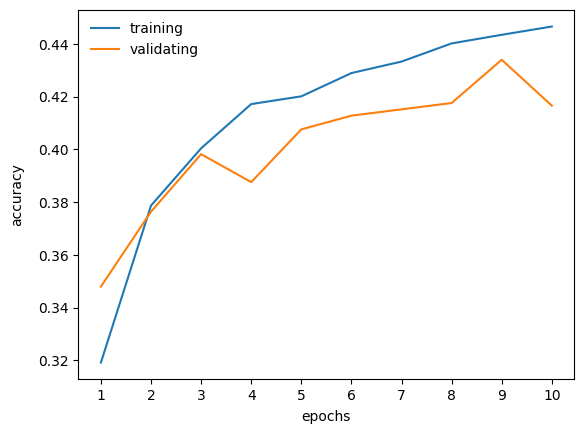

In [14]:
fig, ax = plt.subplots()
ax.plot(history.history['accuracy'], label='training')
ax.plot(history.history['val_accuracy'], label='validating')
ax.set_xticks(range(10))
ax.set_xticklabels(list(range(1,11)))
ax.set_xlabel('epochs', labelpad=5)
ax.set_ylabel('accuracy', labelpad=10)
ax.legend(loc='best', frameon=False)
fig.show()

Both training and validation accuracy got better with each epoch, which means the model is learning. The difference between them is small, so the model isn’t overfitting and is doing well on both sets.

#### Block 9: Evaluate the model by comparing predicted and actual classes for the images in the testing dataset.  Display the first nine images, their actual classes, and their predicted classes.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4353 - loss: 1.5773
Test Accuracy: 0.4314
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


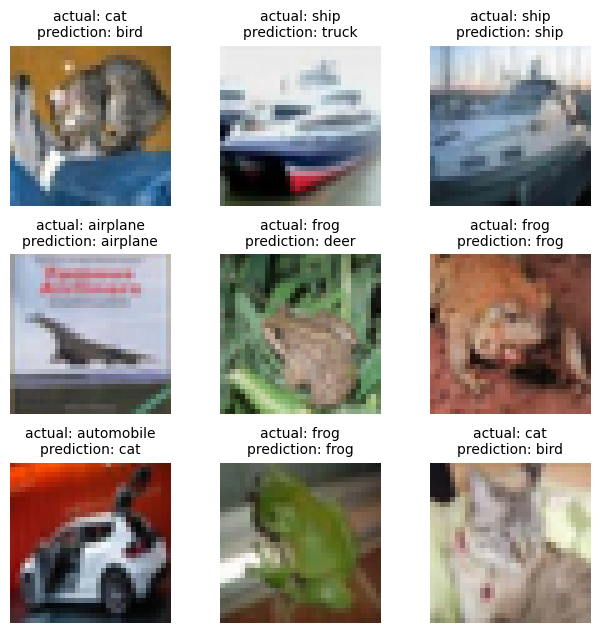

In [15]:
# Evaluate the performance of the model.
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Predict digits for images in the test dataset.
predictions = model.predict(X_test)

# Display the first nine digits and their actual and predicted values.
fig, axs = plt.subplots(3, 3)
fig.set_size_inches((7.5, 7.5))
for i in range(3):
    for j in range(3):
        title1 = f'actual: {class_names[y_test[i*3+j]]}'
        title2 = f'prediction: {class_names[np.argmax(predictions[i*3+j])]}'
        axs[i,j].imshow(X_test[i*3+j], cmap='gray')
        axs[i,j].set_title(title1 + '\n' + title2,
                           fontsize=10)
        axs[i,j].axis('off')
fig.subplots_adjust(hspace=0.3, wspace=0.3)
fig.show()

The model reached a test accuracy of about 43.1%, which is consistent with the validation accuracy. In the sample of 9 test images, some predictions match the actual labels, while others don’t. This shows the model has learned useful features, but still makes mistakes, especially with classes that may look similar.